### Capstone Project: Healthcare - PGP

In [ ]:
# Problem Statement:

# NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for
# the most chronic, costly, and consequential diseases.
# The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes,
# based on certain diagnostic measurements included in the dataset.
# Build a model to accurately predict whether the patients in the dataset have diabetes or not.

In [ ]:
# Dataset Description: The datasets consists of several medical predictor variables and one target variable (Outcome).
# Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

Week 1: Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below,
# a value of zero does not make sense and thus indicates missing value:

In [ ]:
df = pd.read_csv('health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# The above analysis shows that there are no null values in the given dataset

In [ ]:
# Visually explore these variables using histograms. Treat the missing values accordingly.

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

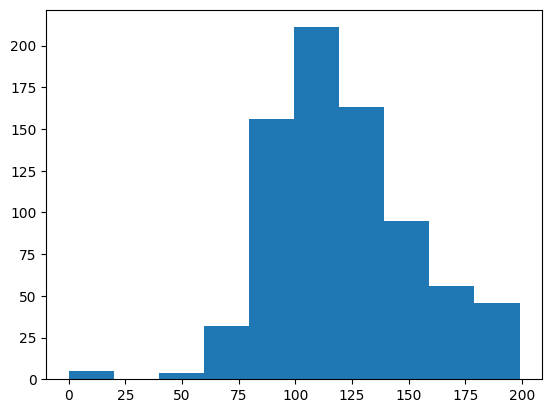

In [ ]:
plt.hist(df['Glucose'])

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

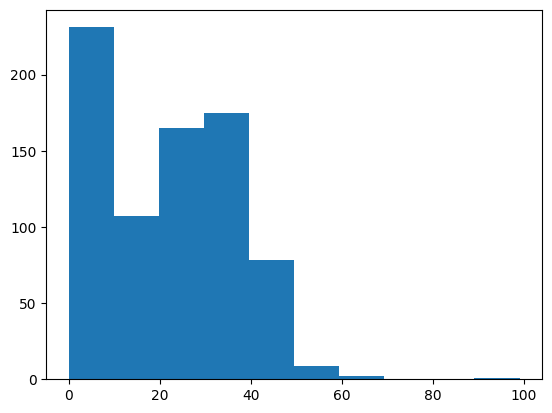

In [ ]:
plt.hist(df['SkinThickness'])

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

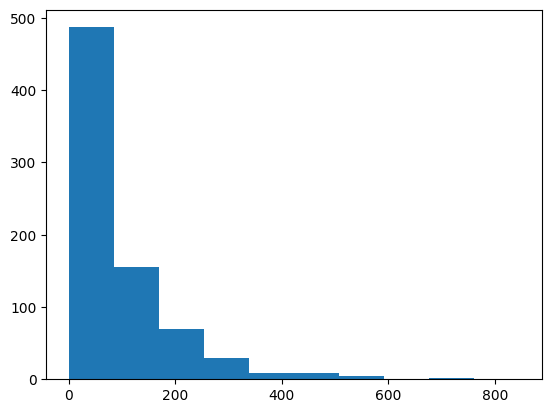

In [ ]:
plt.hist(df['Insulin'])

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

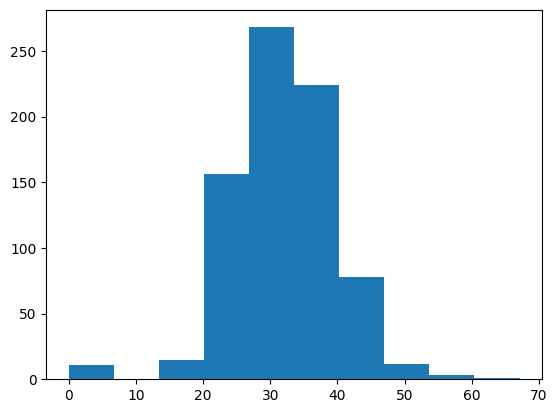

In [ ]:
plt.hist(df['BMI'])

In [ ]:
# There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types
# and the count of variables

<Axes: >

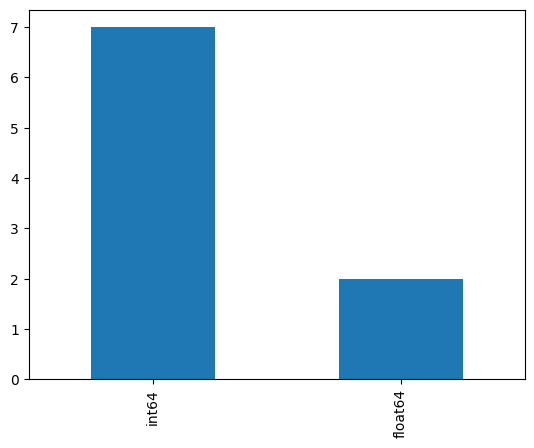

In [ ]:
df.dtypes.value_counts().plot(kind='bar')

Week 2: Data Exploration

In [ ]:
# Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

0    500
1    268
Name: Outcome, dtype: int64

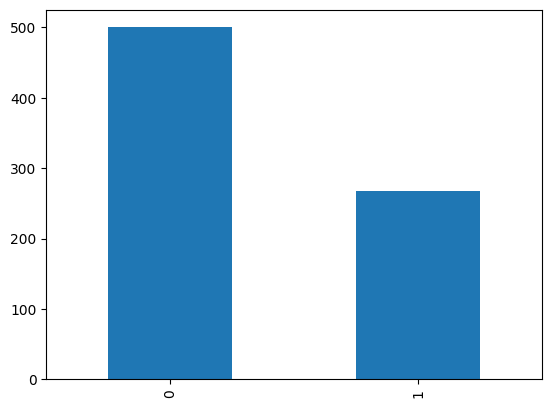

In [ ]:
df['Outcome'].value_counts().plot(kind='bar')
df['Outcome'].value_counts()

In [ ]:
# Since classes in Outcome is little skewed so we will generate new samples using
# SMOTE (Synthetic Minority Oversampling Technique) for the class '1'

In [ ]:
df_X = df.drop('Outcome', axis=1)
df_y = df['Outcome']
print(df_X.shape, df_y.shape)

(768, 8) (768,)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
df_X_resampled, df_y_resampled = SMOTE(random_state=108).fit_resample(df_X, df_y)
print(df_X_resampled.shape, df_y_resampled.shape)

(1000, 8) (1000,)


1    500
0    500
Name: Outcome, dtype: int64

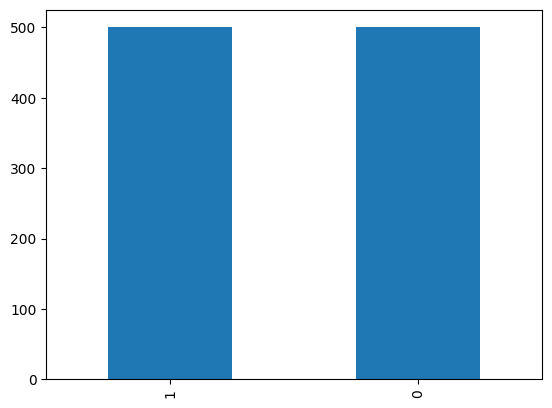

In [ ]:
df_y_resampled.value_counts().plot(kind='bar')
df_y_resampled.value_counts()

In [ ]:
df_resampled = pd.concat([df_X_resampled, df_y_resampled], axis=1)

In [ ]:
# Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

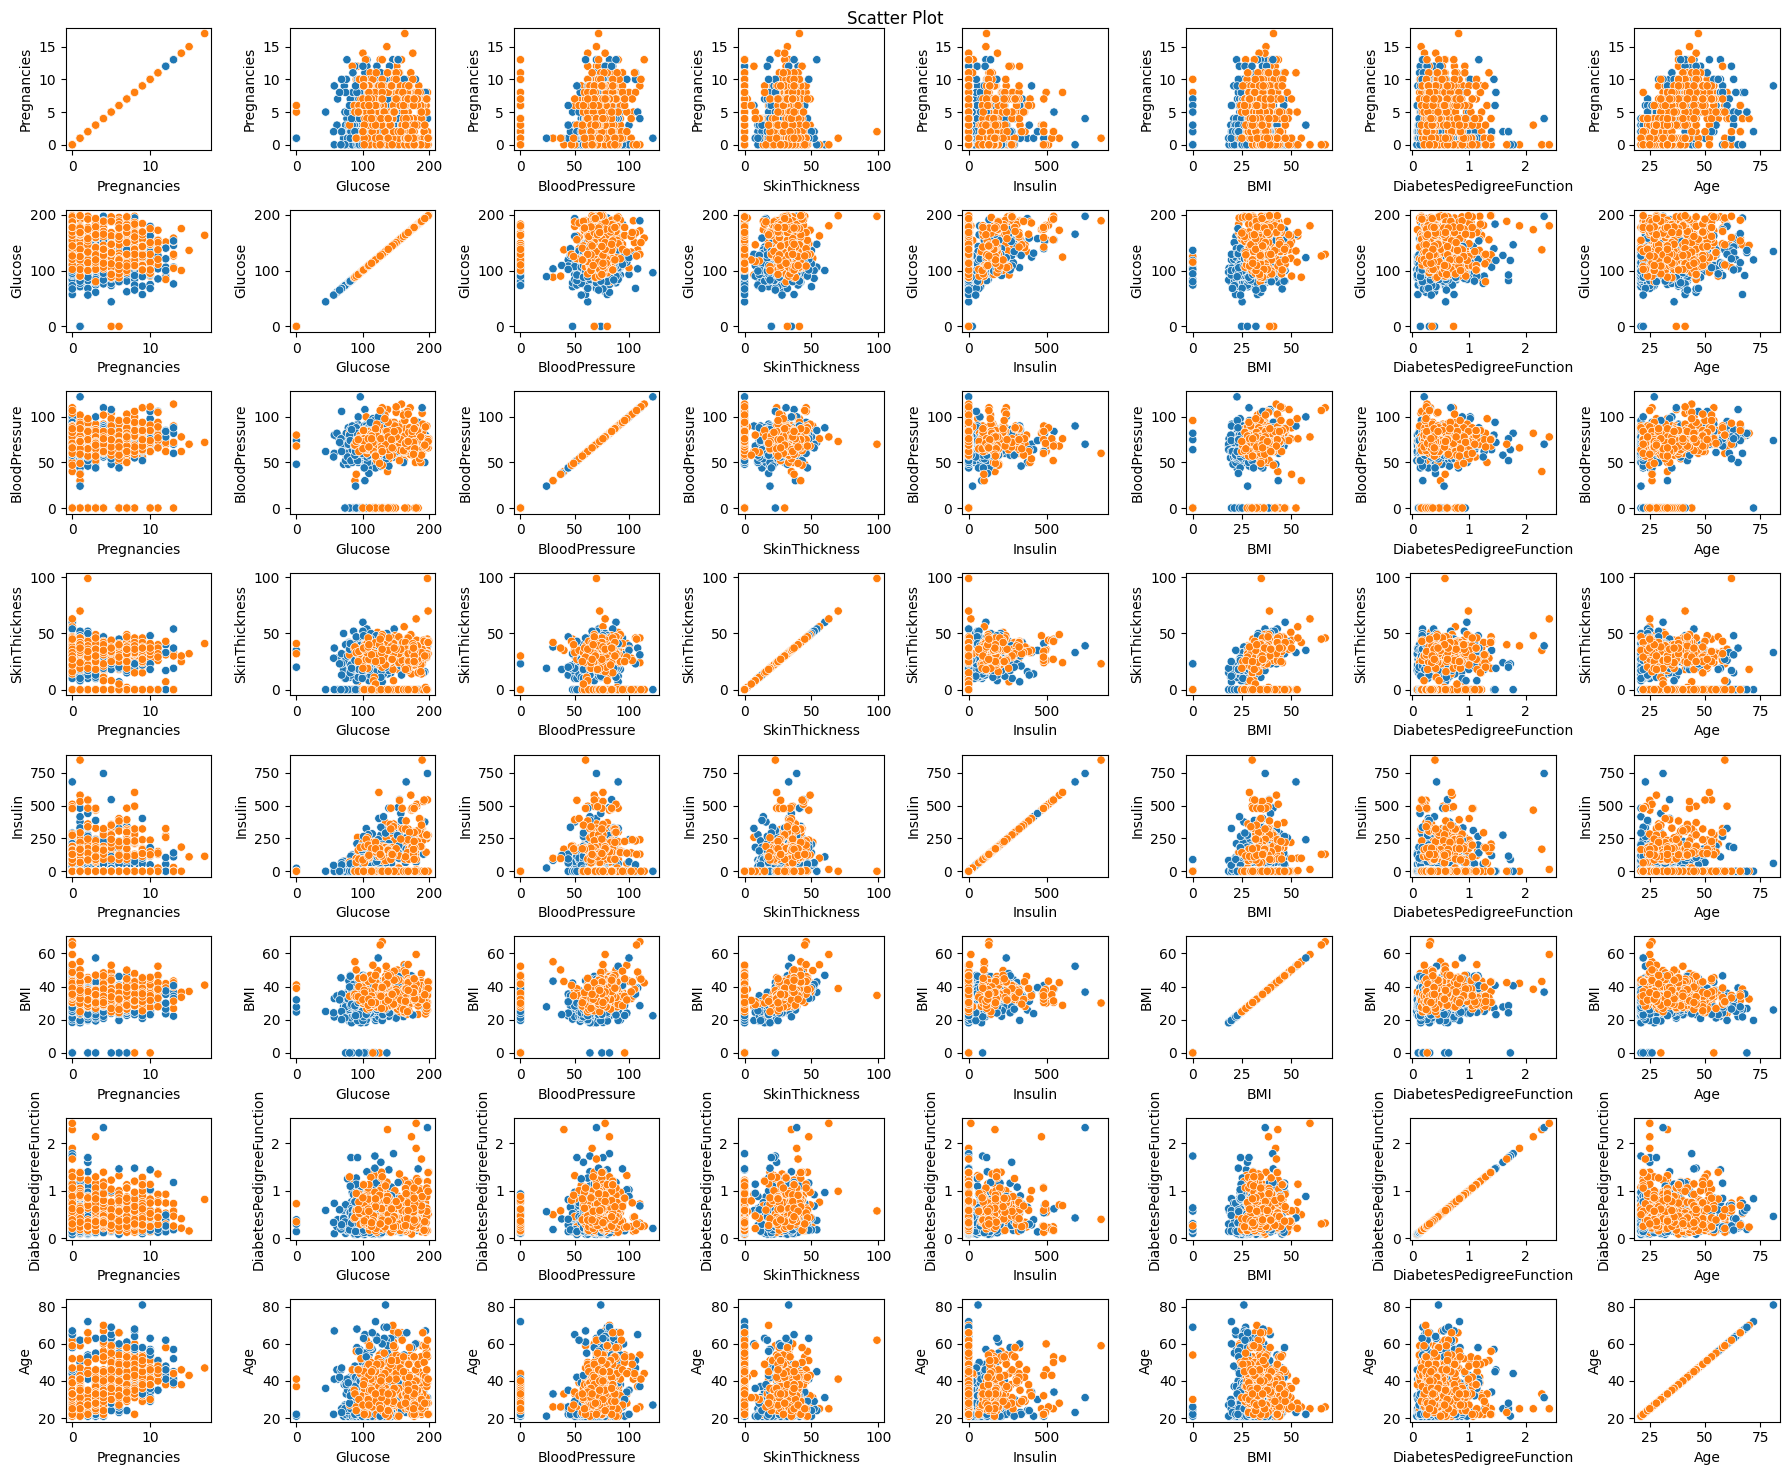

In [ ]:
fig, axes = plt.subplots(8, 8, figsize=(18, 15))
fig.suptitle('Scatter Plot')

for i, col_y in enumerate(df_X_resampled.columns):
    for j, col_x in enumerate(df_X_resampled.columns):
        sns.scatterplot(ax=axes[i, j], x=col_x, y=col_y, data=df_resampled, hue="Outcome", legend = False)

plt.tight_layout()

In [ ]:
# Observations from scatter plot of pairs of features:

# Glucose is crucial in distinguishing between the Outcome classes.
# Age is also a feature to distinguish between classes to some extent.
# A combination of features is needed to build model for prediction of "outcome" class

In [ ]:
# Perform correlation analysis. Visually explore it using a heat map

In [ ]:
df_X_resampled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.079234,0.149745,-0.078501,-0.085190,-0.005217,-0.043518,0.535916
Glucose,0.079234,1.000000,0.137955,0.075288,0.338758,0.243815,0.146262,0.239643
BloodPressure,0.149745,0.137955,1.000000,0.223527,0.105043,0.246696,0.050681,0.249257
SkinThickness,-0.078501,0.075288,0.223527,1.000000,0.463588,0.377672,0.204244,-0.126545
Insulin,-0.085190,0.338758,0.105043,0.463588,1.000000,0.182640,0.162726,-0.036432
BMI,-0.005217,0.243815,0.246696,0.377672,0.182640,1.000000,0.167673,0.020011
DiabetesPedigreeFunction,-0.043518,0.146262,0.050681,0.204244,0.162726,0.167673,1.000000,0.001123
Age,0.535916,0.239643,0.249257,-0.126545,-0.036432,0.020011,0.001123,1.000000


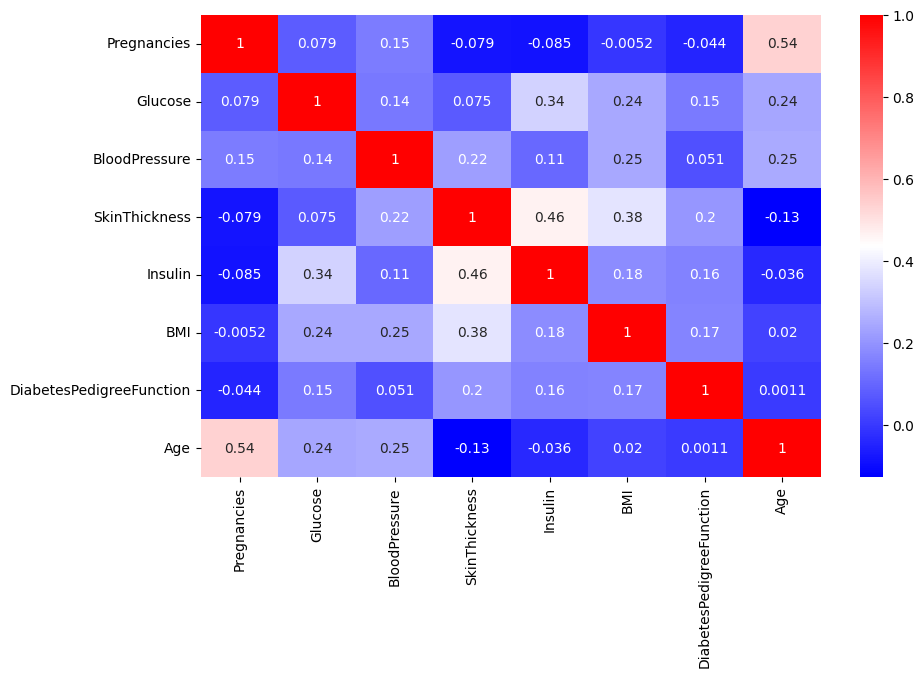

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_X_resampled.corr(), cmap='bwr', annot=True);

In [ ]:
# There exists significant correlation between some pairs Age-Pregnancies, BMI-SkinThickness
# No pair of variables have negative correlation.

Week 3: Data Modeling

In [ ]:
# Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

In [ ]:
# Since this is a classification problem, we will be building all popular classification models for
# our training data and then compare performance of each model on test data to accurately predict target variable (Outcome):

# 1) Logistic Regression
# 2) Decision Tree
# 3) Support Vector Machine (SVM)
# 4) K-Nearest Neighbour (KNN)
# 5) Random Forest

In [ ]:
# Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [ ]:
# Performing Train - Test split on input data

In [ ]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score, precision_recall_curve

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X_resampled, df_y_resampled, test_size=0.15, random_state =10)
X_train.shape, X_test.shape

((850, 8), (150, 8))

In [ ]:
models = []
model_accuracy = []
model_f1 = []
model_auc = []

In [ ]:
# Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(max_iter=300)

In [ ]:
lr1.fit(X_train,y_train)
lr1.score(X_train,y_train)

0.7411764705882353

In [ ]:
lr1.score(X_test, y_test)

0.7866666666666666

In [ ]:
lr2 = LogisticRegression(C=13.257113655901108, max_iter=300)
lr2.fit(X_train,y_train)
lr2.score(X_train,y_train)
lr2.score(X_test, y_test)

0.7933333333333333

AUC: 0.865


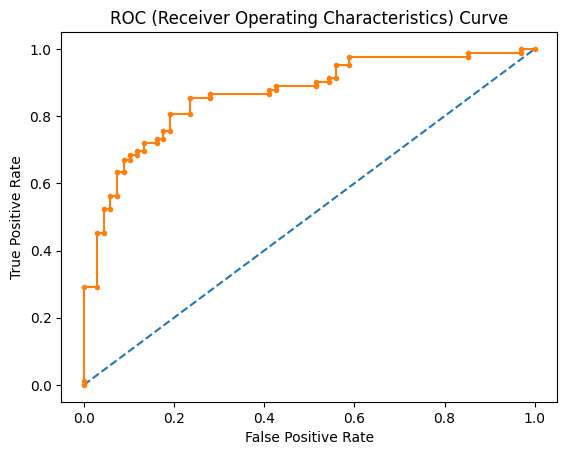

In [ ]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = lr2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_lr = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_lr)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.810 auc_pr=0.894 ap=0.894


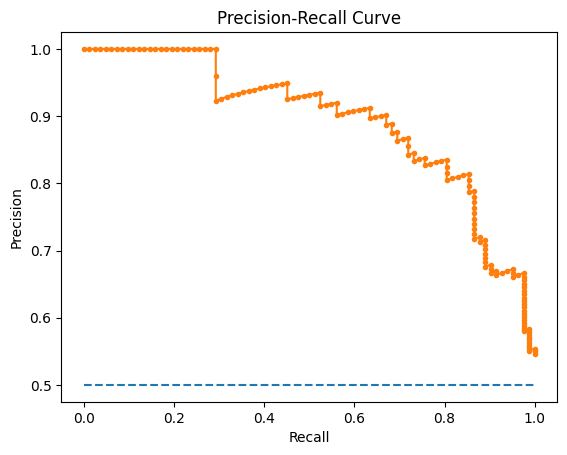

In [ ]:
# Precision Recall Curve

pred_y_test = lr2.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, pred_y_test)
auc_lr_pr = auc(recall, precision)
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_lr_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [ ]:
models.append('LR')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_lr)

In [ ]:
# Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=0)
dt1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
dt2 = DecisionTreeClassifier(max_depth=4)
dt2.fit(X_train,y_train)
DecisionTreeClassifier(max_depth=4)
dt2.score(X_train,y_train)

0.8023529411764706

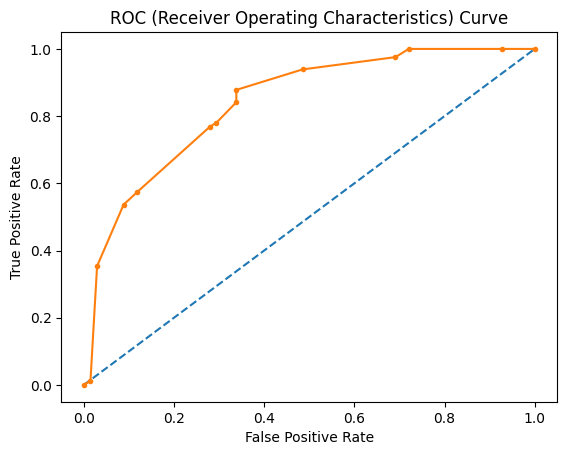

In [ ]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = dt2.predict_proba(X_test)
probs = probs[:, 1]

auc_dt = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.793 auc_pr=0.777 ap=0.831


Text(0.5, 1.0, 'Precision-Recall Curve')

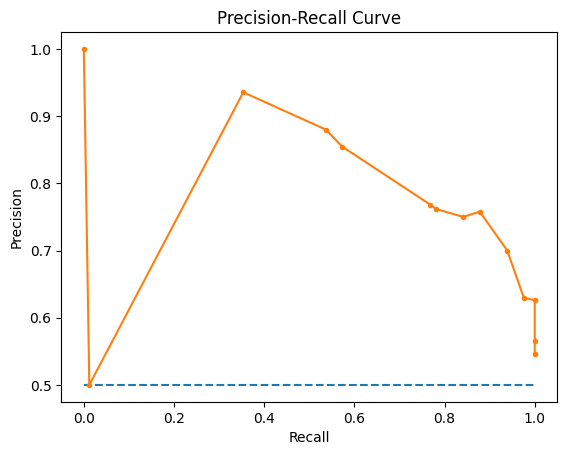

In [ ]:
# Precision Recall Curve

pred_y_test = dt2.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, pred_y_test)
auc_dt_pr = auc(recall, precision)
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_dt_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [ ]:
models.append('DT')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_dt)

In [ ]:
 # K-Nearest Neighbour (KNN) Classification:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
KNeighborsClassifier(n_neighbors=3)
knn1.score(X_train,y_train)

0.8741176470588236

AUC: 0.839


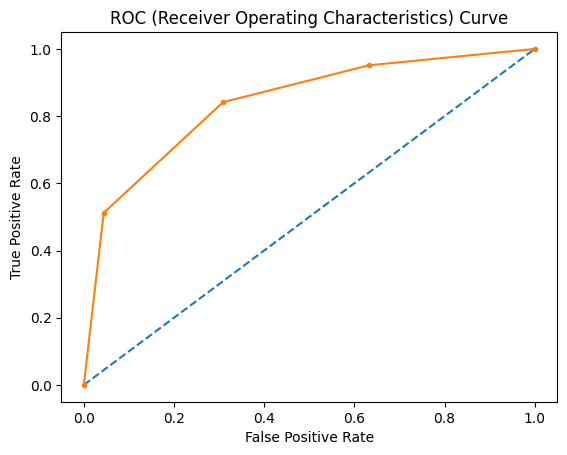

In [ ]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = knn1.predict_proba(X_test)
probs = probs[:, 1]

auc_knn = roc_auc_score(y_test, probs)
print('AUC: %.3f' %auc_knn)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.802 auc_pr=0.882 ap=0.828


Text(0.5, 1.0, 'Precision-Recall Curve')

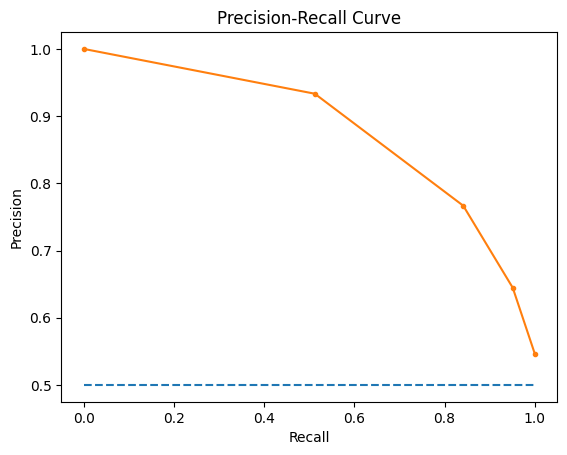

In [ ]:
# Precision Recall Curve

pred_y_test = knn1.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, pred_y_test)
auc_knn_pr = auc(recall, precision)
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_knn_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [ ]:
models.append('KNN')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_knn)

In [ ]:
# Support Vector Machine (SVM) Algorithm:

In [ ]:
from sklearn.svm import SVC
svm1 = SVC(kernel='rbf',probability=True)
svm1.fit(X_train, y_train)
svm1.score(X_train, y_train)

0.7341176470588235

AUC: 0.842


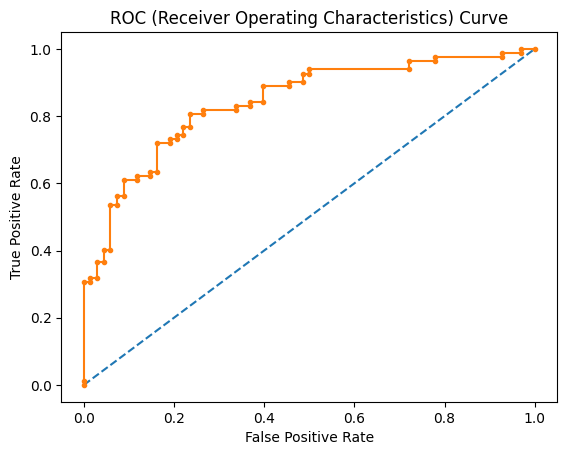

In [ ]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = svm1.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_svm = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_svm)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.798 auc_pr=0.876 ap=0.877


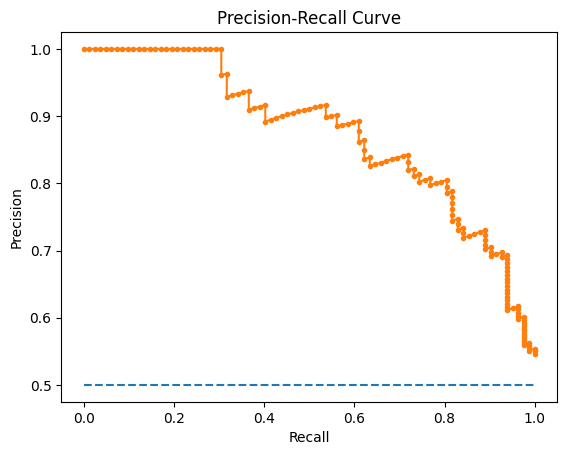

In [ ]:
# Precision Recall Curve

pred_y_test = svm1.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, pred_y_test)
auc_svm_pr = auc(recall, precision)
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_svm_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [ ]:
models.append('SVM')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_svm)

In [ ]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=11)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=11)

In [ ]:
rf.score(X_train,y_train)

0.9952941176470588

In [ ]:
rf.score(X_test,y_test)

0.8066666666666666

AUC: 0.865


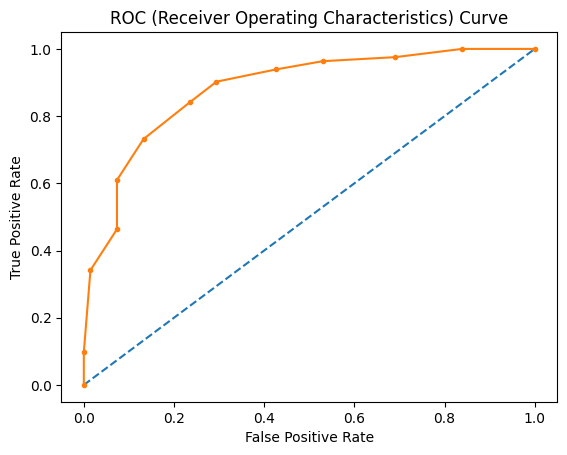

In [ ]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = rf.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_rf = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_lr)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.826 auc_pr=0.876 ap=0.882


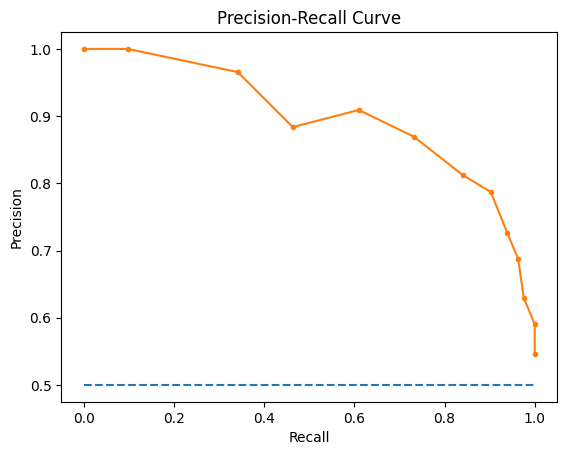

In [ ]:
# Precision Recall Curve

pred_y_test = rf.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, pred_y_test)
auc_rf_pr = auc(recall, precision)
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_svm_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [ ]:
models.append('RF')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_rf)

In [ ]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = ['model','accuracy','f1_score','auc'])
model_summary = model_summary.set_index('model')

Text(0.5, 1.0, 'Comparison of Different Classification Algorithms')

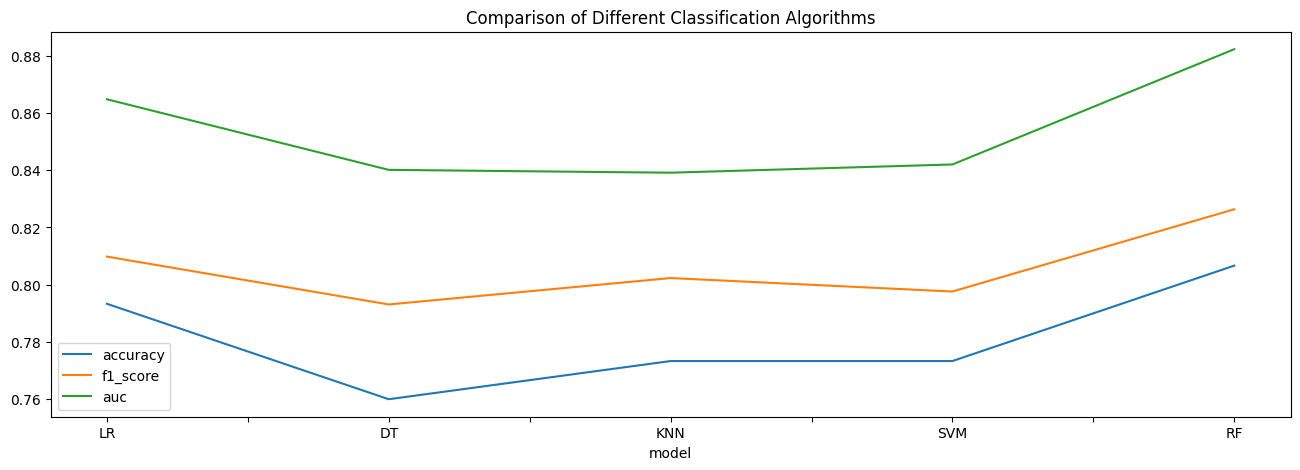

In [ ]:
model_summary.plot(figsize=(16,5))
plt.title("Comparison of Different Classification Algorithms")

In [ ]:
model_summary

,accuracy,f1_score,auc
model,,,
LR,0.793333,0.809816,0.864778
DT,0.760000,0.793103,0.840118
KNN,0.773333,0.802326,0.839132
SVM,0.773333,0.797619,0.842001
RF,0.806667,0.826347,0.882263


In [ ]:
# Logistic Regression has the best accuracy and f1_score.

Week 4: Data Modeling

In [ ]:
# Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.
# Please be descriptive to explain what values of these parameter you have used

In [ ]:
# Logistic regression was found to be the better one among all the classifiers used in the problem.
# we will use it for the model building process

In [ ]:
final_model = lr1

In [ ]:
cr = classification_report(y_test, final_model.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        68
           1       0.80      0.80      0.80        82

    accuracy                           0.79       150
   macro avg       0.78      0.78      0.78       150
weighted avg       0.79      0.79      0.79       150



In [ ]:
confusion = confusion_matrix(y_test, final_model.predict(X_test))
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[52 16]
 [16 66]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)

In [ ]:
print("Accuracy: %.3f"%Accuracy)
print("Precision: %.3f"%Precision)
print("Sensitivity: %.3f"%Sensitivity)
print("Specificity: %.3f"%Specificity)
print("AUC: %.3f"%auc_lr)

Accuracy: 0.787
Precision: 0.805
Sensitivity: 0.805
Specificity: 0.765
AUC: 0.865


Week 4 Visualization in Tableau

In [ ]:
# Link to Tableau Public
# https://public.tableau.com/app/profile/akhila.k1143/viz/Healthcareproject_16805427979310/Dashboard1?publish=yes